# Lab 6

## Jennifer Vo, lab partners with William Olsen
INTRODUCTION: In this lab, we will be ...

## Setup

First let's setup our lab by making fake background data. For our background we will use a Poisson distribution with a mean of 100. Let's create this data and then plot it to visualize the background.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import math
import pickle

#this sets the size of the plots to something useful
plt.rcParams["figure.figsize"] = (10,8)

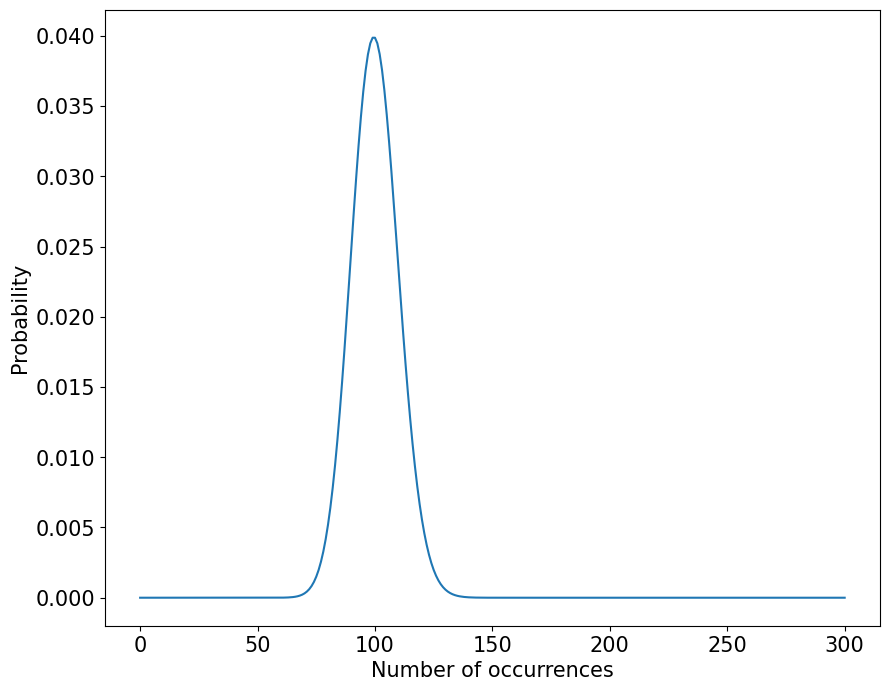

In [6]:
bkgd_mean = 100
bkgd_x = np.linspace(0,300,301)
bkgd_prob = stats.poisson.pmf(bkgd_x, bkgd_mean)

plt.plot(bkgd_x, bkgd_prob)
plt.tick_params(labelsize=15)
plt.xlabel('Number of occurrences', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

## Problem 1
The first problem that we'll look at is to determine where the 5$\sigma$ sensitivity threshold is. I will ask the following statistical question:
__How strong of a signal must I observe for my background to have a probability, corresponding to a significance of 5$\sigma$, of producing that signal?__

I can convert my statistical question to a mathematical expression. First, the Poisson distribution is discreet, with a probability mass function given by: $\frac{\lambda^{k} e^{-k}}{k!}$ which equals the probability of obtaining exactly k occurrences.

I will need to convert my threshold of 5$\sigma$ to a corresponding probability of obtaining that threshold using the survival function (sf) of scipy.stats.norm with a normal distribution of mean 0 and standard deviation 1. This integrates the normal distribution between x = 5 to x = $\infty$. Then, I will take this calculated probability and use the inverse survival function on a Poisson distribution with mean 100 to determine what corresponding number of occurences (signal value) I would need to see to get a significance of 5 $\sigma$.

Thus to answer my statistical question, I should solve for x in the following equation, where $\lambda$ = 100:
$$\int_{5}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} dx = \sum_{k=x}^{\infty} \frac{\lambda^{k} e^{-k}}{k!} $$

In [14]:
sigma_a = 5
prob_a = stats.norm.sf(sigma_a)

signal_a = stats.poisson.isf(prob_a, bkgd_mean)
print(f'The signal I must observe for my background have a probability (corresponding to a 5 sigma significance) of producing that signal is {signal_a}.')

The signal I must observe for my background have a probability (corresponding to a 5 sigma significance) of producing that signal is 154.0.


From the plot, I can see that a signal of 154 corresponding to a 5 sigma significance is indeed what I would expect. The signal is greater than the mean and has a very small probability of occurring.

## Problem 2
Next I will inject a signal of strength 8 $\sigma$, and I will do this many times, say 5 times. (Inject this signal into your background data many times.)

In [35]:
# determine what is a signal of strength 8 sigma is
sigma_b = 8
prob_b = stats.norm.sf(sigma_b)

signal_b = stats.poisson.isf(prob_b, bkgd_mean)
print(f'The signal I must observe for my background have a probability (corresponding to a 10 sigma significance) of producing that signal is {signal_b}.')

The signal I must observe for my background have a probability (corresponding to a 10 sigma significance) of producing that signal is 190.0.


In [60]:
# define background data and inj_signal as an array
inj_signal = [190, 190, 190, 190, 190]
N_good = 1000
data_good = stats.poisson.rvs(bkgd_mean, size=N_good)
data_inj = np.append(data_good, inj_signal)

I would like to first histogram how bright this observed signal appears to be, and observe its shape. I would also like to determine if my observed signal is biased (in other words, is the observed value equally likely to be stronger or weaker than the true injected signal?). In addition, I will see whether it is symmetric.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

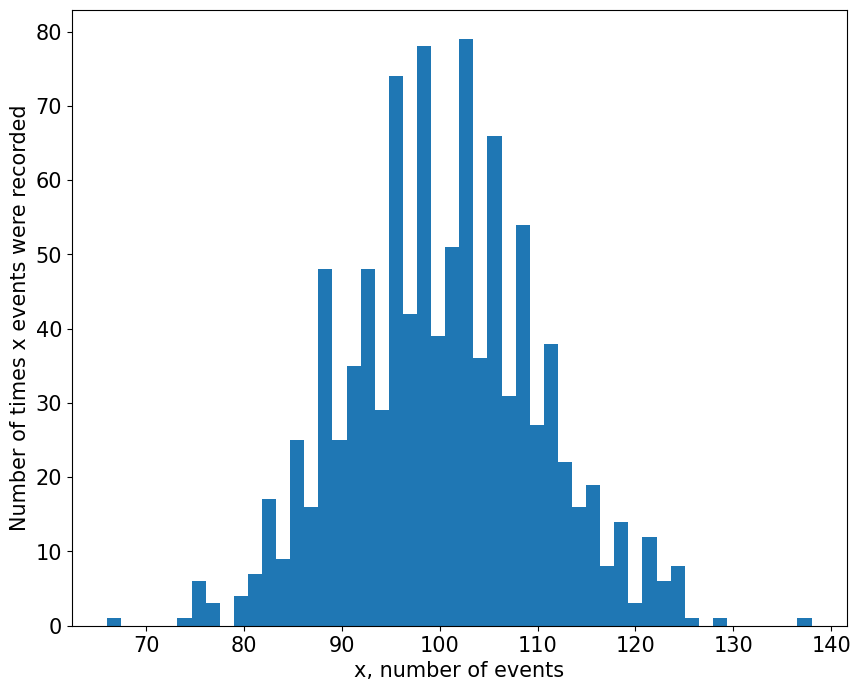

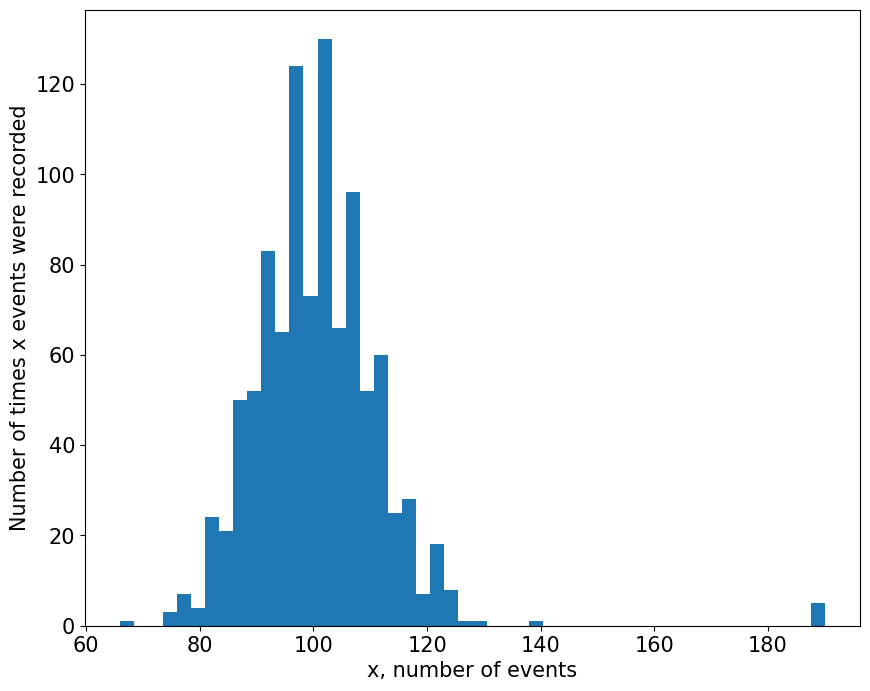

In [61]:
# histogram the data without the injected signal
plt.hist(data_good, 50)
plt.tick_params(labelsize = 15)
plt.ylabel('Number of times x events were recorded', fontsize = 15)
plt.xlabel('x, number of events', fontsize = 15)
plt.show()

# histogram the data with the injected signal
plt.hist(data_inj, 50)
plt.tick_params(labelsize = 15)
plt.ylabel('Number of times x events were recorded', fontsize = 15)
plt.xlabel('x, number of events', fontsize = 15)
plt.show()

## Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

b) For the same injected signal power as in problem 2, show that you get the same answer.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?